In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# I/ Regresión lineal

1. Carga de los datos
2. Entendimiento y limpieza de los datos
3. Particionamiento del conjunto de datos en entrenamiento y prueba
4. Entrenamiento de un primer modelo de regresión lineal
5. Entrenamiento de un segundo modelo usando su propia implementación de
descenso de gradiente estocástic
6. Evaluación de los modelos

## 1. Carga de los datos

In [4]:
df_audi = pd.read_csv("./carDataset/carDataset/audi.csv")
df_bmw = pd.read_csv("./carDataset/carDataset/bmw.csv")
# df_cclass = pd.read_csv("./carDataset/carDataset/cclass.csv")
# df_focus = pd.read_csv("./carDataset/carDataset/focus.csv")
df_ford = pd.read_csv("./carDataset/carDataset/ford.csv")
df_hyundi = pd.read_csv("./carDataset/carDataset/hyundi.csv")
df_merc = pd.read_csv("./carDataset/carDataset/merc.csv")
df_skoda = pd.read_csv("./carDataset/carDataset/skoda.csv")
df_toyota = pd.read_csv("./carDataset/carDataset/toyota.csv")
df_vauxhall = pd.read_csv("./carDataset/carDataset/vauxhall.csv")
df_vw = pd.read_csv("./carDataset/carDataset/vw.csv")

Vamos a añadir una columna "brand" a todos los Dataframes para que al concatenar todos los Dataframes en un único Dataframe podamos distinguir las marcas.

In [5]:
data_frames = {'Audi': df_audi, 'Bmw': df_bmw, 'Ford': df_ford,
               'Hyundi': df_hyundi, 'Merc': df_merc, 'Skoda': df_skoda, 'Toyota': df_toyota, 'Vauxhall': df_vauxhall, 'Vw': df_vw}

for brand, df in data_frames.items():
    df['brand'] = brand

In [6]:
df_audi.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4   
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0   
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4   
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0   
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0   

  brand  
0  Audi  
1  Audi  
2  Audi  
3  Audi  
4  Audi

In [7]:
df_audi.model.value_counts()

model
 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: count, dtype: int64

In [8]:
df_audi.shape

(10668, 10)

In [9]:
df_bmw.head()

model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize brand  
0         2.0   Bmw  
1         2.0   Bmw  
2         3.0   Bmw  
3         1.5   Bmw  
4         3.0   Bmw

In [10]:
df_bmw.model.value_counts()

model
 3 Series    2443
 1 Series    1969
 2 Series    1229
 5 Series    1056
 4 Series     995
 X1           804
 X3           551
 X5           468
 X2           288
 X4           179
 M4           125
 6 Series     108
 Z4           108
 7 Series     106
 X6           106
 X7            55
 i3            43
 8 Series      39
 M5            29
 M3            27
 M2            21
 i8            17
 M6             8
 Z3             7
Name: count, dtype: int64

In [11]:
df_bmw.shape

(10781, 10)

In [12]:
# df_cclass.head()

In [13]:
# df_cclass.model.value_counts()

In [14]:
# df_cclass.shape

In [15]:
# df_focus.head()

In [16]:
# df_focus.model.value_counts()

In [17]:
# df_focus.shape

In [18]:
df_ford.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0   Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0   
1    Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0   
2    Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0   
3   Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5   
4   Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0   

  brand  
0  Ford  
1  Ford  
2  Ford  
3  Ford  
4  Ford

In [19]:
df_ford.model.value_counts()

model
 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Name: count, dtype: int64

In [20]:
df_ford.shape

(17965, 10)

In [21]:
df_hyundi.head()

model  year  price transmission  mileage fuelType  tax(£)   mpg  \
0      I20  2017   7999       Manual    17307   Petrol     145  58.9   
1   Tucson  2016  14499    Automatic    25233   Diesel     235  43.5   
2   Tucson  2016  11399       Manual    37877   Diesel      30  61.7   
3      I10  2016   6499       Manual    23789   Petrol      20  60.1   
4     IX35  2015  10199       Manual    33177   Diesel     160  51.4   

   engineSize   brand  
0         1.2  Hyundi  
1         2.0  Hyundi  
2         1.7  Hyundi  
3         1.0  Hyundi  
4         2.0  Hyundi

In [22]:
df_hyundi.model.value_counts()

model
 Tucson      1300
 I10         1092
 I30          536
 I20          496
 Kona         328
 Ioniq        284
 Santa Fe     245
 IX20         204
 I40          127
 IX35         118
 I800         117
 Getz           6
 Veloster       3
 Terracan       2
 Accent         1
 Amica          1
Name: count, dtype: int64

In [23]:
df_hyundi.shape

(4860, 10)

Lets change the name, because all the tax values are in £.

In [24]:
df_hyundi.rename(columns={'tax(£)': 'tax'}, inplace=True)

In [25]:
df_hyundi["tax"].describe()

count    4860.000000
mean      121.147119
std        58.003289
min         0.000000
25%       125.000000
50%       145.000000
75%       145.000000
max       555.000000
Name: tax, dtype: float64

In [26]:
df_merc.sample(5)

model  year  price transmission  mileage fuelType  tax   mpg  \
11557     E Class  2015  15999    Automatic    36634   Diesel  125  56.5   
1228      C Class  2016  15699    Semi-Auto    30301   Diesel   20  65.7   
10308     E Class  2012   8238    Automatic    60178   Diesel  145  55.4   
12406   GLA Class  2018  20000    Automatic    23974   Diesel  150  56.5   
6665      X-CLASS  2019  26995    Automatic      500   Diesel  260  35.8   

       engineSize brand  
11557         2.1  Merc  
1228          2.1  Merc  
10308         2.1  Merc  
12406         2.1  Merc  
6665          2.3  Merc

In [27]:
df_merc.model.value_counts()

model
 C Class      3747
 A Class      2561
 E Class      1953
 GLC Class     960
 GLA Class     847
 B Class       591
 CL Class      511
 GLE Class     461
 SL CLASS      260
 CLS Class     237
 V Class       207
 S Class       197
 GL Class      121
 SLK            95
 CLA Class      86
 X-CLASS        82
 M Class        79
 GLS Class      74
 GLB Class      19
 G Class        15
 CLK             7
 CLC Class       3
 R Class         2
180              1
230              1
220              1
200              1
Name: count, dtype: int64

In [28]:
df_merc.shape

(13119, 10)

In [29]:
df_merc["tax"].describe()

count    13119.000000
mean       129.972178
std         65.260286
min          0.000000
25%        125.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64

In [30]:
df_skoda.head()

model  year  price transmission  mileage fuelType  tax   mpg  \
0        Octavia  2017  10550       Manual    25250   Petrol  150  54.3   
1         Citigo  2018   8200       Manual     1264   Petrol  145  67.3   
2        Octavia  2019  15650    Automatic     6825   Diesel  145  67.3   
3   Yeti Outdoor  2015  14000    Automatic    28431   Diesel  165  51.4   
4         Superb  2019  18350       Manual    10912   Petrol  150  40.9   

   engineSize  brand  
0         1.4  Skoda  
1         1.0  Skoda  
2         2.0  Skoda  
3         2.0  Skoda  
4         1.5  Skoda

In [31]:
df_skoda.model.value_counts()

model
 Fabia           1571
 Octavia         1477
 Superb           791
 Kodiaq           472
 Citigo           470
 Yeti Outdoor     458
 Karoq            390
 Scala            192
 Rapid            152
 Kamiq            141
 Yeti             136
 Roomster          17
Name: count, dtype: int64

In [32]:
df_skoda.shape

(6267, 10)

In [33]:
df_toyota.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0   GT86  2016  16000       Manual    24089   Petrol  265  36.2         2.0   
1   GT86  2017  15995       Manual    18615   Petrol  145  36.2         2.0   
2   GT86  2015  13998       Manual    27469   Petrol  265  36.2         2.0   
3   GT86  2017  18998       Manual    14736   Petrol  150  36.2         2.0   
4   GT86  2017  17498       Manual    36284   Petrol  145  36.2         2.0   

    brand  
0  Toyota  
1  Toyota  
2  Toyota  
3  Toyota  
4  Toyota

In [34]:
df_toyota.model.value_counts()

model
 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: count, dtype: int64

In [35]:
df_toyota.shape

(6738, 10)

In [36]:
df_vauxhall.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0   Corsa  2018   7885       Manual     9876   Petrol  145  55.4         1.4   
1   Corsa  2019  11995       Manual     2500   Petrol  145  54.3         1.4   
2   Corsa  2017   9777    Automatic     9625   Petrol  145  47.9         1.4   
3   Corsa  2016   8500       Manual    25796   Petrol   30  55.4         1.4   
4   Corsa  2019  10000       Manual     3887   Petrol  145  43.5         1.4   

      brand  
0  Vauxhall  
1  Vauxhall  
2  Vauxhall  
3  Vauxhall  
4  Vauxhall

In [37]:
df_vauxhall.model.value_counts()

model
 Corsa            3441
 Astra            2805
 Mokka X          2127
 Insignia         1030
 Mokka             815
 Crossland X       683
 Zafira            599
 Grandland X       568
 Adam              463
 Viva              448
 Meriva            251
 Combo Life        156
 GTC               101
 Zafira Tourer      58
 Antara             27
 Agila              22
 Vivaro             21
 Cascada             4
 Vectra              4
 Ampera              3
 Kadjar              3
 Tigra               3
Name: count, dtype: int64

In [38]:
df_vauxhall.shape

(13632, 10)

In [39]:
df_vw.sample(10)

model  year  price transmission  mileage fuelType  tax   mpg  \
1283       Golf  2016  11989       Manual    27821   Diesel    0  74.3   
2736       Golf  2020  19000       Manual     3084   Petrol  145  49.6   
8496       Polo  2017   9059       Manual    47134   Petrol   20  60.1   
10593    Tiguan  2018  22062    Semi-Auto    22184   Diesel  145  49.6   
382       T-Roc  2019  19490       Manual     5262   Petrol  145  44.1   
2199       Golf  2017  22400       Manual    21000   Petrol  145  35.8   
7968       Polo  2017  11302       Manual    11199   Petrol   20  60.1   
2183       Golf  2020  22995       Manual     2000   Petrol  145  49.6   
6743    T-Cross  2020  23990    Automatic     4616   Petrol  145  45.6   
5645     Passat  2019  17490       Manual     8179   Diesel  150  54.3   

       engineSize brand  
1283          1.6    Vw  
2736          1.5    Vw  
8496          1.2    Vw  
10593         2.0    Vw  
382           1.0    Vw  
2199          2.0    Vw  
7968          1.2    Vw  
2183          1.5    Vw  
6743          1.0    Vw  
5645          2.0    Vw

In [40]:
df_vw.model.value_counts()

model
 Golf               4863
 Polo               3287
 Tiguan             1765
 Passat              915
 Up                  884
 T-Roc               733
 Touareg             363
 Touran              352
 T-Cross             300
 Golf SV             268
 Sharan              260
 Arteon              248
 Scirocco            242
 Amarok              111
 Caravelle           101
 CC                   95
 Tiguan Allspace      91
 Beetle               83
 Shuttle              61
 Caddy Maxi Life      59
 Jetta                32
 California           15
 Caddy Life            8
 Eos                   7
 Caddy                 6
 Caddy Maxi            4
 Fox                   4
Name: count, dtype: int64

In [41]:
df_vw.shape

(15157, 10)

En los dataframe df_focus y df_cclass falta las columnas "tax" y "mpg".

Y en el DF df_hyundi, la columna "tax" se llama "tax(£)".

Entonces, he cambiado tax(£) a tax (supongando que tax es en $)

Y vamos a poner todo esos DataFrame en un grande DataFrame

In [42]:
columnas_falta = ['tax', 'mpg']
datos_falta = pd.DataFrame(columns=columnas_falta)
datos_falta

Empty DataFrame
Columns: [tax, mpg]
Index: []

In [43]:
# df_focus = pd.concat([df_focus, datos_falta], axis=1)
# df_cclass = pd.concat([df_cclass, datos_falta], axis=1)

In [44]:
# df_cclass.sample(5)

In [45]:
# df_cclass['tax'].describe()

In [46]:
# df_cclass['mpg'].describe()

In [47]:
# df_cclass.shape

In [48]:
# df_focus.shape

### Finalmente no vamos a utilisar df_focus y df_cclass

In [49]:
df = pd.concat([df_audi, df_bmw, df_ford, df_hyundi, df_merc, df_skoda, df_toyota, df_vauxhall, df_vw], ignore_index=True)
df.sample(10)

model  year  price transmission  mileage fuelType  tax   mpg  \
71435       Corsa  2013   4498       Manual    62626   Petrol  125  51.4   
10505          A5  2015  16250       Manual    61720   Petrol  200  42.8   
9760           A1  2016  11995       Manual    12000   Petrol    0  67.3   
11848    4 Series  2017  24000    Semi-Auto    20398   Diesel  145  50.4   
73850       Astra  2018  11500       Manual    31424   Petrol  140  51.4   
93834        Polo  2018  12490       Manual    14152   Petrol  145  64.2   
12882    3 Series  2019  24990       Manual     4850   Diesel  145  64.2   
8847           A5  2015  17500       Manual    36496   Diesel  145  53.3   
44310   GLC Class  2018  30682    Automatic    14517   Diesel  145  56.5   
90104      Passat  2019  31990    Automatic       25   Diesel  145  48.7   

       engineSize     brand  
71435         1.2  Vauxhall  
10505         2.0      Audi  
9760          1.0      Audi  
11848         3.0       Bmw  
73850         1.4  Vauxhall  
93834         1.0        Vw  
12882         2.0       Bmw  
8847          2.0      Audi  
44310         2.1      Merc  
90104         2.0        Vw

In [50]:
df.model.value_counts()

model
 Fiesta     6557
 Golf       4863
 Focus      4588
 C Class    3747
 Corsa      3441
            ... 
 Ranger        1
200            1
 A2            1
 RS7           1
 Amica         1
Name: count, Length: 195, dtype: int64

In [51]:
df.shape

(99187, 10)

In [52]:
df.to_csv('carDataset.csv', index=False)

## 2. Entendimiento y limpieza de los datos 

### 2.1. Perfilamiento de datos

In [53]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
brand            object
dtype: object

In [54]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop('price')
n = len(numerical_features)
numerical_features

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

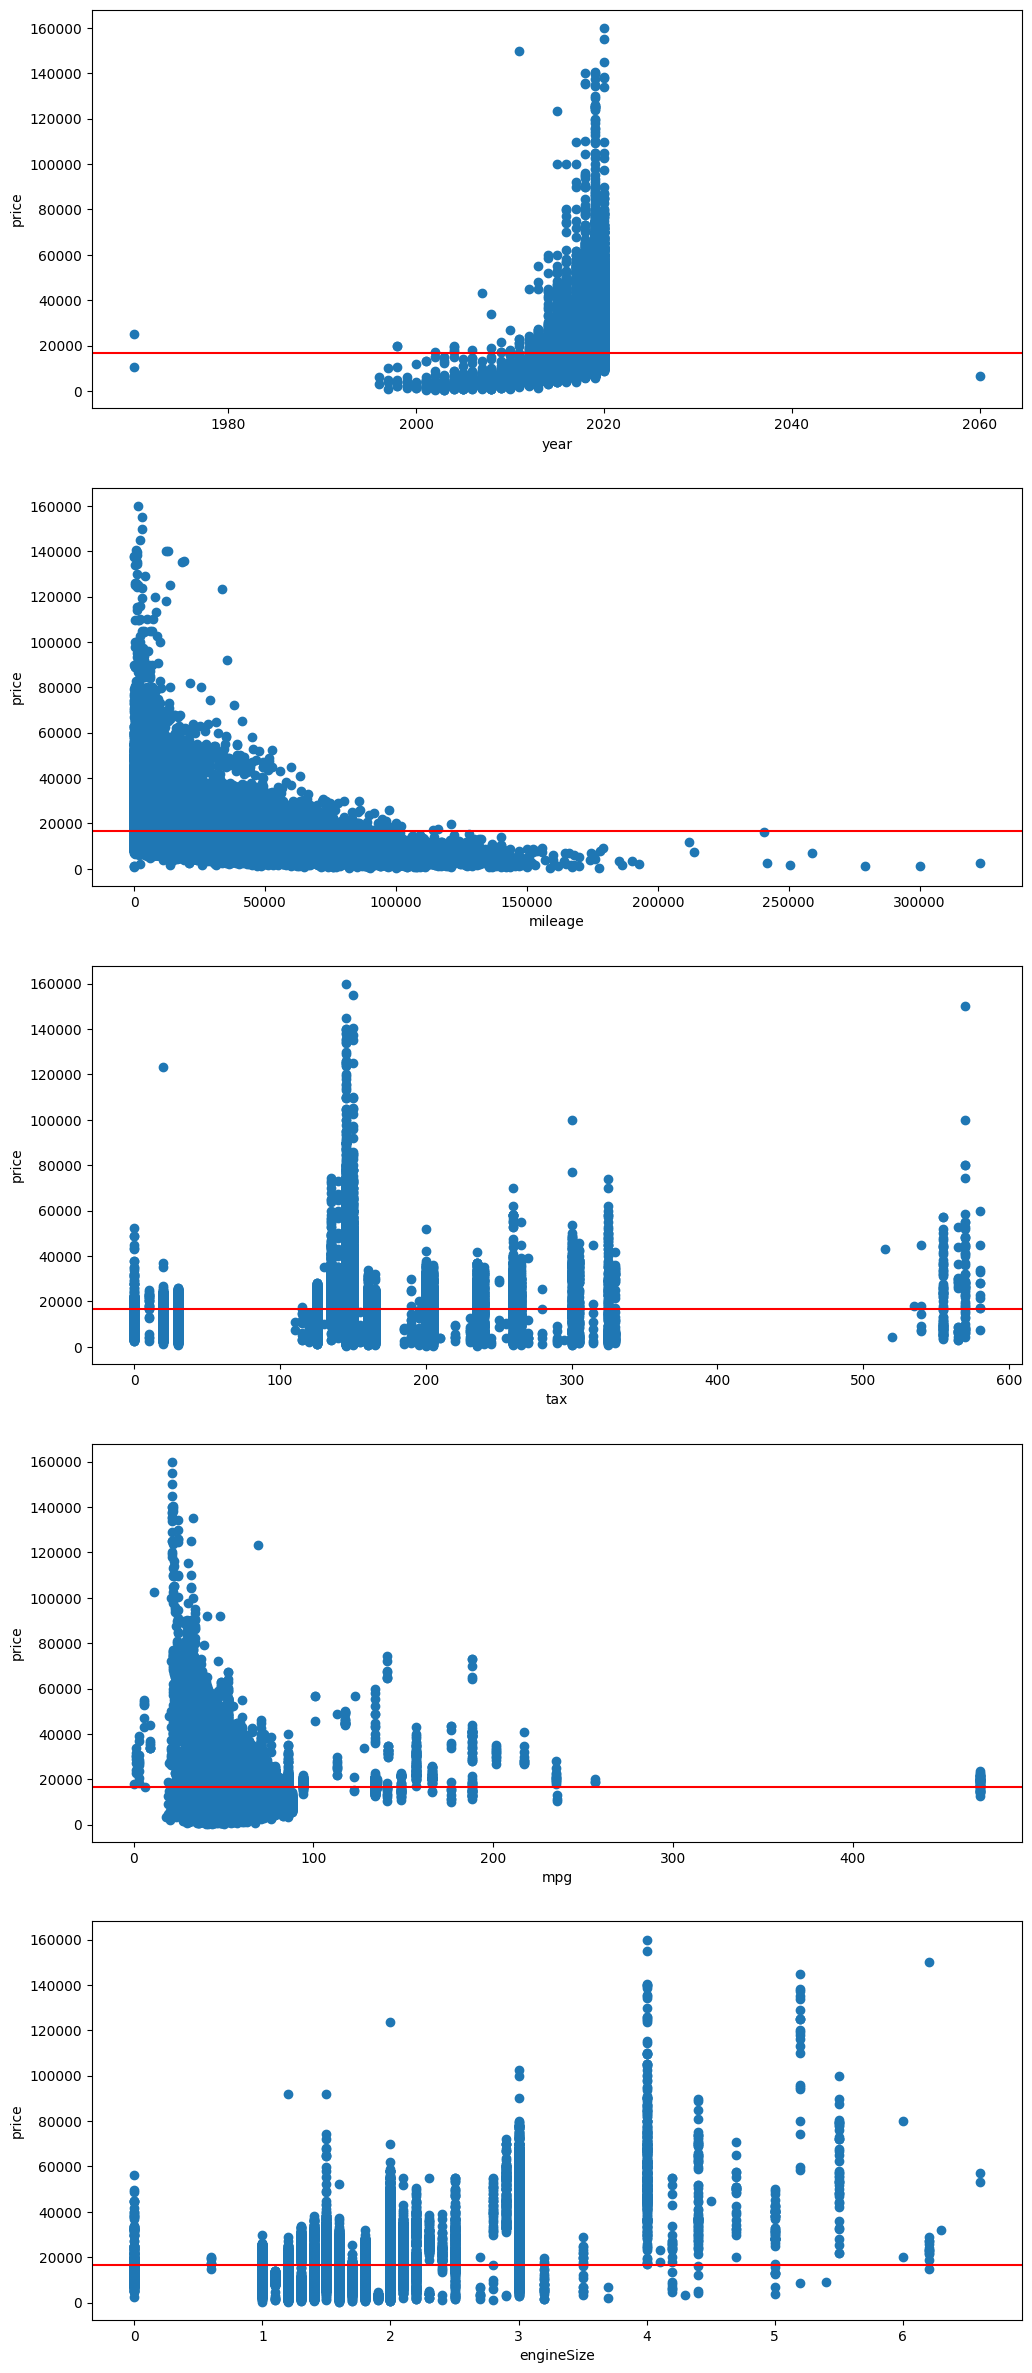

In [55]:
plt.figure(figsize=(12, 30))
for column, i in zip(numerical_features, range(1, n+1)):
    plt.subplot(n, 1, i)
    plt.scatter(df[column], df['price'])
    plt.axhline(y = df['price'].mean(), c='r')
    plt.xlabel(column)
    plt.ylabel('price')

(array([5.8252e+04, 3.4674e+04, 4.8060e+03, 1.1280e+03, 2.3500e+02,
        3.9000e+01, 1.9000e+01, 1.6000e+01, 1.4000e+01, 4.0000e+00]),
 array([   450. ,  16404.9,  32359.8,  48314.7,  64269.6,  80224.5,
         96179.4, 112134.3, 128089.2, 144044.1, 159999. ]),
 <BarContainer object of 10 artists>)

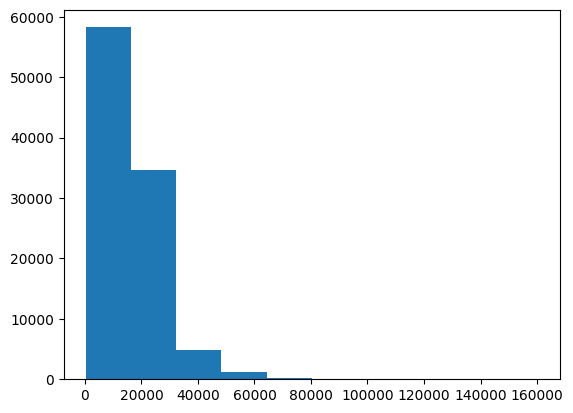

In [56]:
plt.hist(df['price'])

<Axes: >

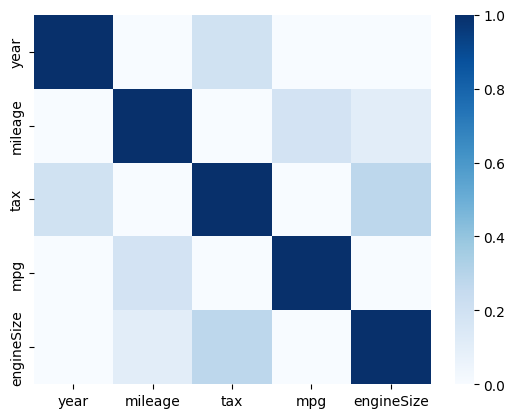

In [57]:
sns.heatmap(df[numerical_features].corr(), cmap="Blues", vmin=0, vmax=1)

Los valores no están demasiado correlacionados entre ellos

### 2.2. Análisis de calidad de datos

Revisamos las dimensiones de calidad: unicidad, completitud, consistencia, validez.
En particular miramos si se presenta algún problema de calidad relacionado con la dimensión y pensamos en opciones para su posterior corrección en la etapa de preparación. Esta actividad la hicimos en el notebook de entendimiento de datos y acá retomaremos los elementos más importantes, para ilustrar el concepto.

#### 2.2. a) Completitud - Análisis de valores nulos o vacíos

In [58]:
# Cálculo de porcentaje de valores nulos por columna
((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
brand           0.0
dtype: float64

In [59]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
brand           0
dtype: int64

No hay valores nulos en el dafaframe

#### 2.2. b) Unicidad

In [60]:
df.duplicated(keep=False).sum()

2457

In [61]:
df.drop_duplicates(inplace=True)

In [62]:
df.duplicated(keep=False).sum()

0

In [63]:
df.shape

(97712, 10)

#### 2.2. c) Consistencia

In [64]:
df.fuelType.value_counts()

fuelType
Petrol      53982
Diesel      40419
Hybrid       3059
Other         246
Electric        6
Name: count, dtype: int64

In [65]:
df.model.value_counts()

model
 Fiesta     6509
 Golf       4797
 Focus      4555
 C Class    3694
 Corsa      3285
            ... 
 Ranger        1
200            1
 A2            1
 RS7           1
 Amica         1
Name: count, Length: 195, dtype: int64

In [66]:
df['model'].nunique()

195

In [67]:
aa = df.model.value_counts()[df.model.value_counts() < 50].index.unique()
len(aa)

63

In [68]:
df.model.value_counts()[df.model.value_counts() < 50].sum()

760

Lets try to eliminate the model with less than 50 values.

In [69]:
model_counts = df['model'].value_counts()
models_to_keep = model_counts[model_counts >= 50].index
df = df[df['model'].isin(models_to_keep)]

Maybe we shouldn't use this column to train our model. It will be to much columns after the OneHotEncoder.

In [70]:
df.transmission.value_counts()

transmission
Manual       55279
Semi-Auto    22088
Automatic    19576
Other            9
Name: count, dtype: int64

In [71]:
df.brand.value_counts()

brand
Ford        17758
Vw          14817
Vauxhall    13171
Merc        12811
Bmw         10474
Audi        10343
Toyota       6646
Skoda        6171
Hyundi       4761
Name: count, dtype: int64

#### 2.2. d) Validez

In [72]:
df[df['year'] < 1980]

model  year  price transmission  mileage fuelType  tax   mpg  \
56346   M Class  1970  24999    Automatic    14000   Diesel  305  39.2   
81235    Zafira  1970  10495       Manual    37357   Petrol  200  42.2   

       engineSize     brand  
56346         0.0      Merc  
81235         1.4  Vauxhall

In [73]:
df[df['year'] > 2023]

model  year  price transmission  mileage fuelType  tax   mpg  \
39175   Fiesta  2060   6495    Automatic    54807   Petrol  205  42.8   

       engineSize brand  
39175         1.4  Ford

Those values seems to be incorrect. So we eliminate them.

In [74]:
df.drop(df[~((df['year'] >= 1980) & (df['year'] <= 2023))].index, inplace=True)

## 3. Particionamiento del conjunto de datos en entrenamiento y prueba

In [75]:
y = df['price']
X = df.drop(['price'], axis=1)
# X = df[numerical_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((77559, 9), (19390, 9), (77559,), (19390,))

In [77]:
X_train.head()

model  year transmission  mileage fuelType  tax   mpg  engineSize  \
93515      Polo  2014       Manual    29963   Petrol   20  60.1         1.0   
48612   C Class  2018    Automatic    12397   Diesel  145  58.9         2.1   
41076    Tucson  2016       Manual    33500   Diesel   30  61.7         1.7   
62932   Octavia  2018    Automatic    18930   Petrol  145  56.5         1.5   
96205        Up  2017       Manual    14163   Petrol  145  64.2         1.0   

        brand  
93515      Vw  
48612    Merc  
41076  Hyundi  
62932   Skoda  
96205      Vw

In [78]:
y_train.head()

93515     7430
48612    24546
41076    12495
62932    14990
96205     7295
Name: price, dtype: int64

## 4. Entrenamiento de un primer modelo de regresión lineal

In [79]:
categorical_features = df.select_dtypes(include=['object']).columns #.drop(['model'])
print(numerical_features, categorical_features)

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object') Index(['model', 'transmission', 'fuelType', 'brand'], dtype='object')


In [80]:
preprocessor = make_column_transformer((OneHotEncoder(), categorical_features), (StandardScaler(), numerical_features))
# preprocessor = make_column_transformer((StandardScaler(), numerical_features))

In [81]:
model = make_pipeline(preprocessor, LinearRegression())

model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['model', 'transmission', 'fuelType', 'brand'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object'))])),
                ('linearregression', LinearRegression())])

In [82]:
model.score(X_train, y_train)

0.8599273987689369

In [83]:
model.score(X_test, y_test)

0.8424716764997002

We can see that there is an error due to the exaustivity of "model" values. Which means there are too many different models. Some are too few in number, so are not included in the test set. 

We've changed this error by eliminate the model with less than 50 values.

## 5. Entrenamiento de un segundo modelo usando su propia implementación de descenso de gradiente estocástic

## 6. Evaluación de los modelos

### Modelo de scikitlearn :

**R-squared**
$$ R^2 = 1 - \frac{{\sum_{i=1}^n (y_i - \hat{y}_i)^2}}{{\sum_{i=1}^n (y_i - \bar{y})^2}} $$

In [84]:
print('Train r2 score: ', model.score(X_train, y_train))
print('Test r2 score: ', model.score(X_test, y_test))

Train r2 score:  0.8599273987689369
Test r2 score:  0.8424716764997002


Here, the model describes 84% of car price variations.

The R² coefficient measures how well regression model explains the variance in the data. With a value of 0.86 for the training set and 0.84 for the test set, the model accounts for approximately 86% of the variability in prices in the training set and 84% in the test set. This suggests that the model is effective at capturing and explaining the underlying patterns in the data. Higher R² values indicate better predictive capability, and these scores reflect a strong performance in explaining price fluctuations.

**Mean Absolute Error (MAE)**

$$ MAE = {1 \over n}{\sum_{i=1}^n {|y_{i} - \^y_{i}|} } $$

In [85]:
print("Train MAE:", mean_absolute_error(y_train, model.predict(X_train)))
print("Test MAE:", mean_absolute_error(y_test, model.predict(X_test)))

Train MAE: 2213.9707557993097
Test MAE: 2267.8353381224497


The Mean Absolute Error (MAE) quantifies the average magnitude of errors between the model's predictions and the actual prices. In the training set, the MAE is 2213.97, and in the test set, it's 2267.84. This means, on average, the model's predictions have an absolute error of approximately 2214 £ for the training data and about 2268 £ for the test data.

**Root Mean Squeared Error (RMSE)**

$$ RMSE = \sqrt{{1 \over n}{\sum_{i=1}^n {(y_{i} - \^y_{i})^2} }} $$

In [86]:
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

Train RMSE: 3530.2997780239994
Test RMSE: 3827.4341842460817


The Root Mean Squared Error (RMSE) is another measure of prediction accuracy, which considers both the magnitude and direction of errors. In the training set, RMSE is 3530.30, and in the test set, it's 3827.43. This implies that, on average, prediction errors have a magnitude of approximately 3530 £ in the training data and around 3827 £ in the test data. RMSE tends to be larger than MAE when dealing with larger errors. 

While the model has shown strong performance in terms of R², these RMSE values suggest that there's still room for improvement in reducing errors in price predictions.

### Nuestro propio modelo : 

In [87]:
df['price'].describe()

count     96949.000000
mean      16643.795367
std        9475.318826
min         450.000000
25%        9999.000000
50%       14400.000000
75%       20595.000000
max      149948.000000
Name: price, dtype: float64

# II/ Regresión logística

1. Carga de los datos
2. Entendimiento y limpieza de los datos
3. Particionamiento del conjunto de datos en entrenamiento y prueba
4. Entrenamiento de un primer modelo de regresión lineal
5. Entrenamiento de un segundo modelo usando su propia implementación de
descenso de gradiente estocástic
6. Evaluación de los modelos

## 1. Carga de los datos 

In [88]:
df_log = pd.read_csv("framingham.csv")

## 2. Entendimiento y limpieza de los datos 

In [89]:
df_log.shape

(4238, 15)

In [90]:
df_log.head()

male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   
3     0   61              1        30.0     0.0                0   
4     0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

### Ausencia 

In [91]:
df_log.isna().sum().sort_values(ascending=False)

glucose            388
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

Next time we could make an Imputer.

In [92]:
df_log.dropna(axis=0, inplace=True)

### Unicidad

In [93]:
df_log.duplicated(keep = False).sum()

0

There isn't duplicated lines.

In [94]:
df_log['BPMeds'] = df_log['BPMeds'].astype(int)

In [95]:
binary_columns = df_log.columns[(df_log.isin([0, 1])).all()]
numerical_columns = df_log.columns.difference(binary_columns)

print(binary_columns, numerical_columns)

Index(['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'TenYearCHD'],
      dtype='object') Index(['BMI', 'age', 'cigsPerDay', 'diaBP', 'glucose', 'heartRate', 'sysBP',
       'totChol'],
      dtype='object')


In [96]:
for col in binary_columns:
    print(df_log[col].value_counts(), "\n")

male
0    2080
1    1669
Name: count, dtype: int64 

currentSmoker
0    1918
1    1831
Name: count, dtype: int64 

BPMeds
0    3635
1     114
Name: count, dtype: int64 

prevalentStroke
0    3728
1      21
Name: count, dtype: int64 

prevalentHyp
0    2580
1    1169
Name: count, dtype: int64 

diabetes
0    3647
1     102
Name: count, dtype: int64 

TenYearCHD
0    3177
1     572
Name: count, dtype: int64 



In [97]:
for col in numerical_columns:
    print(col + ": \n", df_log[col].describe(), '\n')

BMI: 
 count    3749.000000
mean       25.809651
std         4.065894
min        15.540000
25%        23.090000
50%        25.410000
75%        28.060000
max        56.800000
Name: BMI, dtype: float64 

age: 
 count    3749.000000
mean       49.578821
std         8.569322
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64 

cigsPerDay: 
 count    3749.000000
mean        9.005335
std        11.922440
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64 

diaBP: 
 count    3749.000000
mean       82.933716
std        11.933321
min        48.000000
25%        75.000000
50%        82.000000
75%        90.000000
max       142.500000
Name: diaBP, dtype: float64 

glucose: 
 count    3749.000000
mean       81.883169
std        23.888039
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       39

In [99]:
profiling =pandas_profiling.ProfileReport(df_log)
profiling.to_file("profiling.pdf")
profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Python310\lib\site-packages\ydata_profiling\profile_report.py:360: UserWarning: Extension .pdf not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

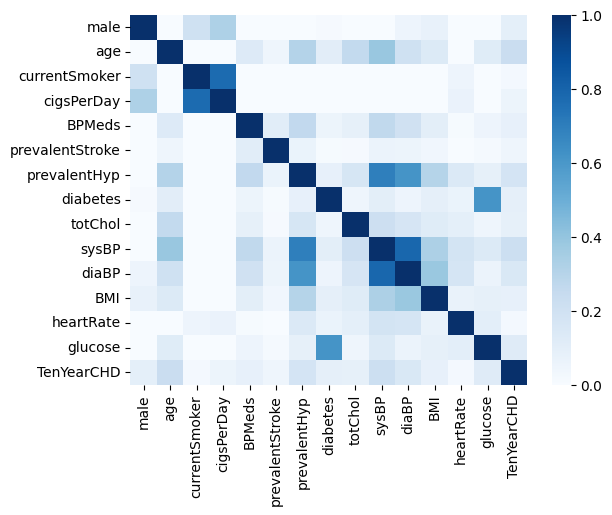

In [100]:
sns.heatmap(df_log.corr(), cmap="Blues", vmin=0, vmax=1)